In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/machine learning projects/training set/xray_dataset_covid19'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/machine learning projects/training set/xray_dataset_covid19/train/PNEUMONIA/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg
/content/drive/MyDrive/machine learning projects/training set/xray_dataset_covid19/train/PNEUMONIA/31BA3780-2323-493F-8AED-62081B9C383B.jpeg
/content/drive/MyDrive/machine learning projects/training set/xray_dataset_covid19/train/PNEUMONIA/1-s2.0-S1684118220300608-main.pdf-001.jpg
/content/drive/MyDrive/machine learning projects/training set/xray_dataset_covid19/train/PNEUMONIA/446B2CB6-B572-40AB-B01F-1910CA07086A.jpeg
/content/drive/MyDrive/machine learning projects/training set/xray_dataset_covid19/train/PNEUMONIA/2C26F453-AF3B-4517-BB9E-802CF2179543.jpeg
/content/drive/MyDrive/machine learning projects/training set/xray_dataset_covid19/train/PNEUMONIA/5e6dd879fde9502400e58b2f.jpeg
/content/drive/MyDrive/machine learning projects/training set/xray_dataset_covid19/train/PNEUMONIA/7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg
/content/drive/MyDrive/ma

In [2]:
# General libraries
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

# Deep learning libraries
#import keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

#Util Component 1: Confusion matrix report/Accuracy measures
from sklearn.metrics import accuracy_score, confusion_matrix

# disabling warnings
import logging
logging.getLogger('tensorflow').disabled = True #Jordan_note: Disable red warning lines seen at model architecture creation.

In [3]:
import pandas as pd
train_dir='/content/drive/MyDrive/machine learning projects/training set/xray_dataset_covid19/train'
test_dir='/content/drive/MyDrive/machine learning projects/training set/xray_dataset_covid19/test'

In [4]:
import os
classes_train=os.listdir(train_dir)
classes_test=os.listdir(test_dir)
print(classes_train)
print(classes_test)

['PNEUMONIA', 'NORMAL']
['NORMAL', 'PNEUMONIA']


In [5]:
# First for Training data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
    zoom_range=0.2, #the amount of zooming u need
    horizontal_flip=True, # Make a horizontal copy of image
    rescale=1.0/255.0, # Normalize the new images
    width_shift_range=0.10, # The percentage of Width shifitning
    height_shift_range=0.10, # The percentage of height shifitning
    shear_range=0.1 #Shear angle in counter-clockwise direction in degrees
)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size=32,
    target_size=(1000,1000,3)[:2]
)

Found 148 images belonging to 2 classes.


In [6]:
# Second for Testing data
test_datagen=ImageDataGenerator(
    rescale=1.0/255.0
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size=32,
    target_size=(1000,1000,3)[:2]
)

Found 40 images belonging to 2 classes.


In [7]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_acc',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization

model=Sequential() 


model.add(Conv2D(32,(5,5),activation='relu',input_shape=(1000,1000,3)))
# 16 is the number of filters, (3,3) it the filter size,acitivation is the activation function and input_shape is the size of the image 
model.add(MaxPooling2D(5,5))
#(2,2) is the pool size 

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(5,5))


model.add(Conv2D(128,(5,5),activation='relu'))
model.add(MaxPooling2D(5,5))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
# 128 is the number of the hideen layers
#model.add(Dropout(0.5))
# Dropout is a function that reducess over fiting by removing random layers every epoch

model.add(Dense(1,activation='sigmoid'))
# 1 the number of outputs 

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 996, 996, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 195, 195, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 35, 35, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)        0

In [11]:
callbacks = [earlystop, learning_rate_reduction]

In [12]:
model.fit(
    train_generator, 
    epochs=10,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/10
5/5 [==============================] - 89s 13s/step - loss: 0.7291 - accuracy: 0.5135 - val_loss: 0.6910 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - 40s 8s/step - loss: 0.6952 - accuracy: 0.5000 - val_loss: 0.6753 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/10
5/5 [==============================] - 39s 8s/step - loss: 0.6830 - accuracy: 0.5000 - val_loss: 0.6466 - val_accuracy: 0.6500 - lr: 0.0010
Epoch 4/10
5/5 [==============================] - 36s 7s/step - loss: 0.6496 - accuracy: 0.6689 - val_loss: 0.5339 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 5/10
5/5 [==============================] - 35s 8s/step - loss: 0.6029 - accuracy: 0.6351 - val_loss: 0.5051 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 6/10
5/5 [==============================] - 35s 7s/step - loss: 0.6236 - accuracy: 0.6351 - val_loss: 0.2849 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/10
5/5 [==============================] - 35s 7s/step - loss: 0.5183 - accuracy: 0.75

In [13]:
losses = pd.DataFrame(model.history.history)

In [14]:
losses.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.729092,0.513514,0.691000,0.50,0.001
1,0.695162,0.500000,0.675261,0.50,0.001
2,0.682992,0.500000,0.646601,0.65,0.001
3,0.649644,0.668919,0.533947,0.80,0.001
4,0.602880,0.635135,0.505125,0.70,0.001


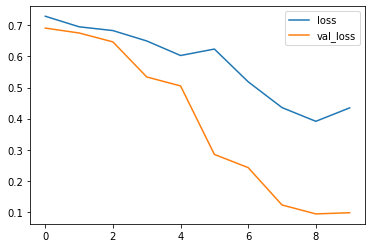

In [15]:
losses[['loss','val_loss']].plot()

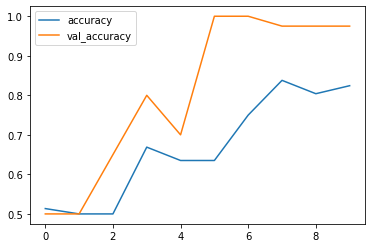

In [16]:
losses[['accuracy','val_accuracy']].plot()

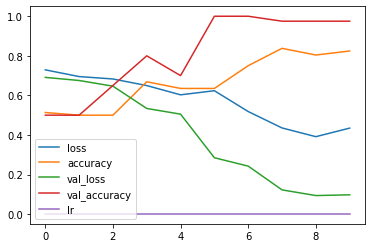

In [17]:
losses.plot()

In [18]:
model.evaluate(test_generator)

2/2 [==============================] - 2s 74ms/step - loss: 0.0976 - accuracy: 0.9750


[0.09756483882665634, 0.9750000238418579]

In [19]:
model_pred=model.predict(test_generator)

In [20]:
print(model_pred)

[[0.88746786]
 [0.9068745 ]
 [0.9347194 ]
 [0.96523505]
 [0.23506272]
 [0.01531092]
 [0.8723917 ]
 [0.04848612]
 [0.00475524]
 [0.00887837]
 [0.01951696]
 [0.02889663]
 [0.00543043]
 [0.03614127]
 [0.09328646]
 [0.89221084]
 [0.97166216]
 [0.96218824]
 [0.8520345 ]
 [0.01296151]
 [0.9341892 ]
 [0.10999145]
 [0.9388677 ]
 [0.01170989]
 [0.44229317]
 [0.01501447]
 [0.8750873 ]
 [0.8417263 ]
 [0.01407417]
 [0.00622616]
 [0.9821868 ]
 [0.6201301 ]
 [0.94518226]
 [0.0106932 ]
 [0.00326206]
 [0.7399413 ]
 [0.9458875 ]
 [0.07835745]
 [0.9042853 ]
 [0.03322616]]


In [21]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [23]:
from tensorflow.keras.preprocessing import image
predict_path='/content/drive/MyDrive/machine learning projects/training set/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0072-0001.jpeg'
my_image = image.load_img(predict_path,target_size=(1000,1000,3))

In [24]:
import numpy as np
my_image = np.expand_dims(my_image, axis=0)

In [25]:
np.argmax(model.predict(my_image))

0

In [29]:
from tensorflow.keras.preprocessing import image
predict_path='/content/drive/MyDrive/machine learning projects/training set/xray_dataset_covid19/test/PNEUMONIA/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day0.jpg'
my_image = image.load_img(predict_path,target_size=(1000,1000,3))

In [30]:
import numpy as np
my_image = np.expand_dims(my_image, axis=0)

In [31]:
np.argmax(model.predict(my_image))

0